## Observations and Insights 


In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
full_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the DataFrame.
mouse_count = len(full_df["Mouse ID"].unique())
mouse_count

249

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Select all duplicate rows based on multiple column names in list
duplicatemouse = full_df[full_df.duplicated(["Mouse ID", "Timepoint"])]
print("Duplicate Rows based on 2 columns are:", duplicatemouse, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemouse_df = full_df[full_df["Mouse ID"] == "g989"]
duplicatemouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_df = full_df.set_index("Mouse ID")
cleanmouse_df = full_df.drop("g989", axis=0)
cleanmouse_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_df = cleanmouse_df.reset_index()
cleanmouse_count = len(cleanmouse_df["Mouse ID"].unique())
cleanmouse_count

248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen
meanvolume = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()

medianvolume = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

varvolume = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

stdevvolume = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

semvolume = cleanmouse_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": meanvolume,
                           "Median": medianvolume,
                           "Variance": varvolume,
                           "Standard Deviation": stdevvolume,
                           "SEM": semvolume})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

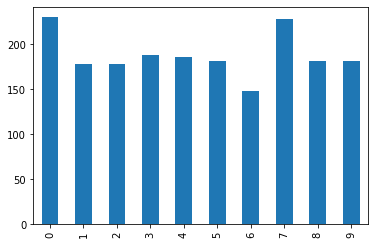

In [90]:
# Generate a bar plot showing the number of mice per time point 
# for each treatment throughout the course of the study using pandas.
countbydrug = cleanmouse_df.groupby(["Drug Regimen"]).count()
countbydrug = countbydrug.reset_index()
countbydrug[["Drug Regimen","Mouse ID"]].plot(kind="bar", legend=False)

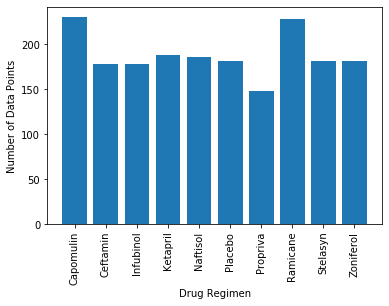

In [93]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.
x_axis = countbydrug["Drug Regimen"]
y_axis = countbydrug["Mouse ID"]
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.show()

## Pie Plots

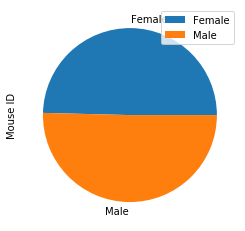

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
countbygender = cleanmouse_df.groupby(["Mouse ID", "Sex"]).count()
countbygender = countbygender.drop(['Drug Regimen', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis = 1)
countbygender = countbygender.reset_index()
countbygender = countbygender.groupby(["Sex"]).count()
countbygender.plot.pie(y="Mouse ID")

([<matplotlib.patches.Wedge at 0x1f81a21c0f0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

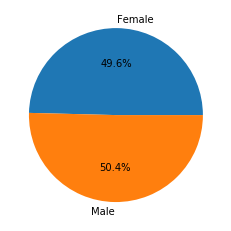

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

y = countbygender["Mouse ID"]

plt.pie(y, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
